### 단축키 사용법
- 실행 단축키
 - ctrl + Enter : 실행 후 커서가 그대로 위치
 - shift + Enter : 실행 후 커서를 아래 셀로 이동
 - alt + Enter : 실행 후 아래 셀 생성하고 아래로 이동
- 마크다운 변환 (코드 -> 텍스트)
 - ctrl + m + m

- 코드모드로 변환 (텍스트 -> 코드)
 - ctrl + m + y

- 셀 아래에 추가하기
 - ctrl + m + b

- 셀 위에 셀 추가하기
 - ctrl + m + a


### 딥러닝 맛보기
- 딥러닝이란?
 - 인간의 신경망을 모방하여 학습하고 예측하는 기술
 - 대량의 데이터에서 복잡한 패턴이나 규칙을 찾아내는 능력이 뛰어남
 - 머신러닝에 비해 조금더 유연한 사고를 함.
 - 인간의 뉴런 == 딥러닝의 선형모델
 - 주로 영상, 음성, 이미지 처리에 사용이 됨.

- tensorflow
 - 구글이 만든 딥러닝을 위한 라이브러리

- keras
 - tensorflow 위에서 동작하는 라이브러리로 사용자 친화적 라이브러리


In [ ]:
# tensorflow 버전 확인
import tensorflow as tf
print(tf.__version__)

# 2.13.0
# 설치버전 확인 이유 : 프로젝트 진행시 오픈소스 가져다 쓸 때 충돌방지

2.13.0


In [ ]:
# 리눅스 기반의 코랩 (리눅스 명령어 그대로 사용 가능)
# 리눅스 명령어를 사용하여 현재 작업 디렉토리 확인
!pwd # printt work directory

/content


In [ ]:
# 현재 작업하고 있는 디렉토리의 파일 목록 조회
!ls

drive  sample_data


In [ ]:
# 작업 디렉토리 변경
# %cd (change directory) - %는 영구적인걸 의미
%cd "/content/drive/MyDrive/Colab Notebooks/DeepLearning"

/content/drive/MyDrive/Colab Notebooks/DeepLearning


In [ ]:
# 다시 현재 폴더의 경로 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/DeepLearning


### 목표
- 공부시간에 따른 수학성적을 예측하는 회귀모델을 만들어보자
- keras 활용해서 신경망 구성하는 방법을 연습해보자

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
data = pd.read_csv("./data/student-mat.csv",delimiter=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
# 데이터 정보확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 문제와 답으로 분리
- 입력특성 : 1개 (studytime)
- 정답 : G3

In [ ]:
# 문제 데이터 (X)
X = data['studytime']
# 정답 데이터 (y)
y = data['G3']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=915, test_size=0.2)

In [ ]:
# 크기 확인
X_train.shape, y_train.shape

((316,), (316,))

In [ ]:
X_test.shape, y_test.shape

((79,), (79,))

### 머신러닝 모델과 딥러닝 모델의 차이점
- 머신러닝
 - 완제품 장난감 : 팔정도만 움직일 수 있음(하이퍼 파라미터만 조절이 가능)
 - 모델 생성(완성된 객체 사용) -> 모델 학습 -> 모델 예측 -> 모델 평가

- 딥러닝
 - 레고블럭 : 다양한 구성이 가능
 - 모델 생성(몸델을 직접 구성) -> 모델 학습 -> 모델 예측 -> 모델 평가


### 머신러닝 모델링(선형회귀모델)

In [ ]:
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.metrics import mean_squared_error # 회귀 모델의 평가지표 도구

In [ ]:
from sklearn import linear_model
# 1. 모델 생성
linear_model = LinearRegression()

# 2. 모델 학습 (학습용 문제, 학습용 정답)
linear_model.fit(X_train.values.reshape(-1, 1), y_train)

# 3. 모델 예측 (테스트용 문제)
linear_pre = linear_model.predict(X_test.values.reshape(-1,1))

# 4. 모델 평가 (실제 값, 예측 값)
mean_squared_error(y_test,linear_pre)

24.058078771701606

In [ ]:
# 머신러닝 모델은 입력특성을 2차원으로 받는다
# 1차원 -> 2차원 변경
X_train.values.reshape(316, 1)

array([[1],
       [1],
       [1],
       [2],
       [1],
       [4],
       [1],
       [2],
       [2],
       [1],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [2],
       [1],
       [2],
       [3],
       [4],
       [3],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [4],
       [3],
       [3],
       [2],
       [1],
       [1],
       [2],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [3],
       [1],
       [2],
       [1],
       [3],
       [1],
       [4],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
    

# 딥러닝 모델링(모델 구조 설계)

In [ ]:
# 딥러닝 모델 불러오기
# 텐서플로우 안에 있는 keras
from tensorflow.keras.models import Sequential # 모델의 뼈대
# 신경망의 구성 요소(하나씩 조립)
from tensorflow.keras.layers import InputLayer, Dense, Activation
# InputLayer : 입력층
# Dense : 밀집도
# Activation : 활성화 함수

##### 딥러닝 모델 설계 순서
1. 신경망 구조 설계
2. 신경망 학습 및 평가 방법 설정
3. 학습
4. 예측 및 평가

In [ ]:
# 1. 신경망 구조 설계
# 뼈대 생성
model = Sequential()

# 입력층
model.add(InputLayer(input_shape = (1,))) # 입력 특성의 개수를 작성 -> 입력 특성은 studytime으로 한 개

# 중간층 (은닉층)
model.add(Dense(units = 10)) # 뉴런 10개를 연결해서 딥러닝 모델을 만들겠다 / 학습의 능력을 결정하는 층
model.add(Activation('sigmoid')) # 활성화 함수 : 인간의 모방을 위함(위 선형함수와 짝꿍)

# 출력층
model.add(Dense(units = 1)) # 예측할 데이터의 형태, units = 1은 현재 예측할 데이터는 성적 데이터 1개이기 때문에 하나로 모으라는 뜻

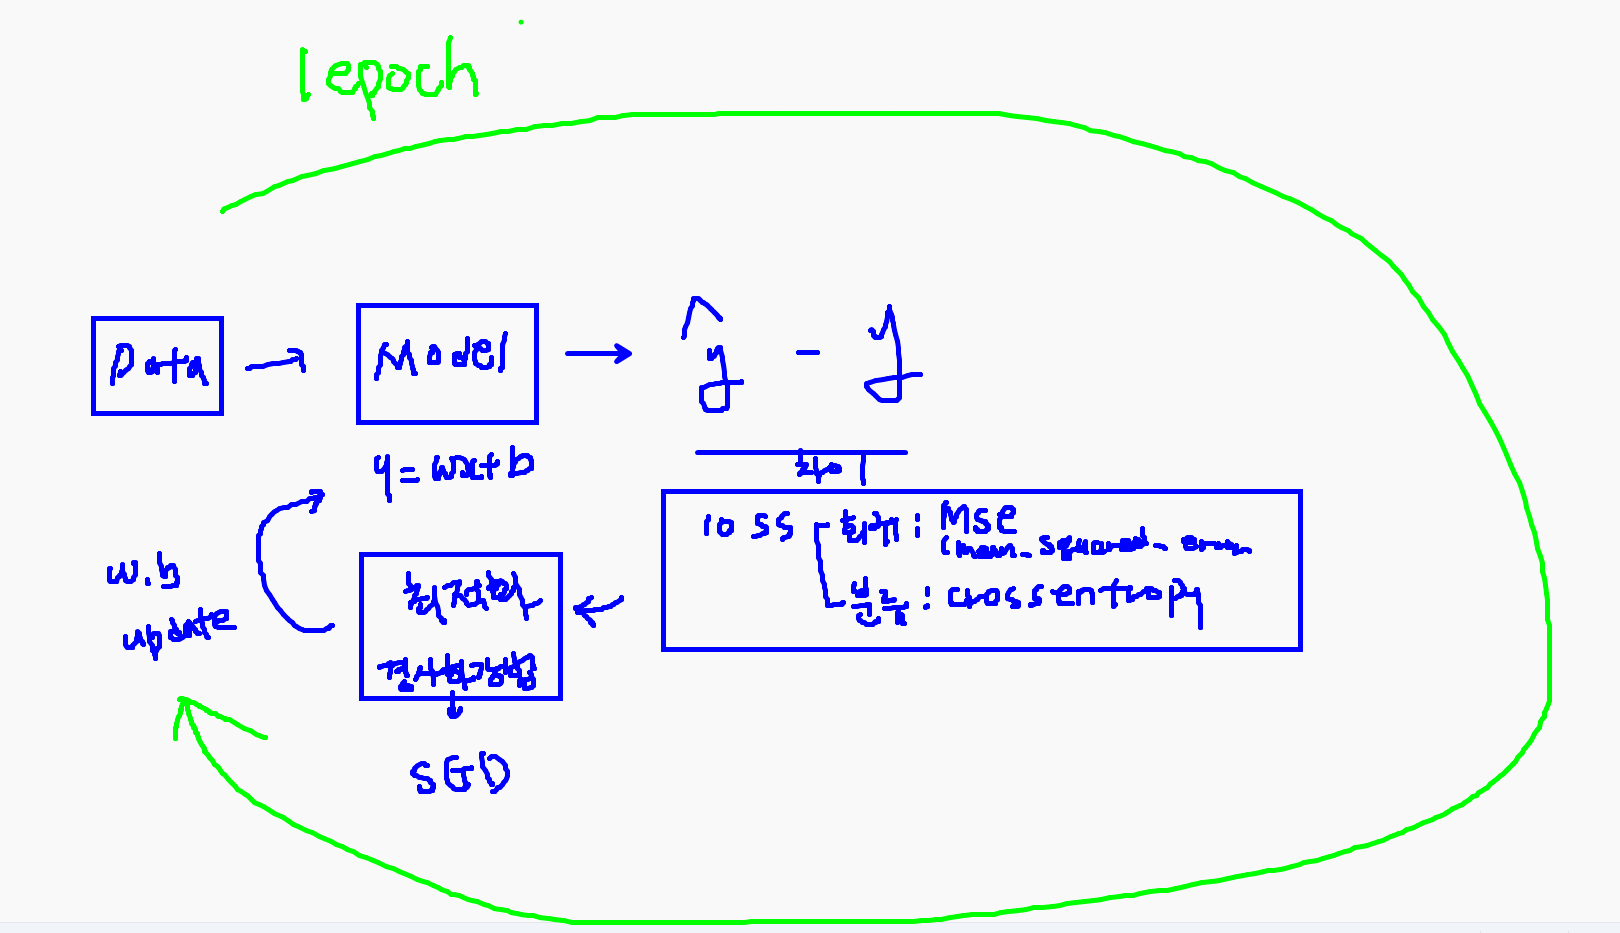

In [ ]:
from sklearn import metrics
from scipy import optimize
# 2. 신경망 학습 및 평가 방법 설정
# 딥러닝 모델은 학습법과 평가법을 지정해줘야 된다.
model.compile(loss = 'mean_squared_error', # 모델의 잘못된 정도(오차) 측정 알고리즘
              optimizer = 'SGD', # 모델의 w,b 값을 최적화하는 알고리즘
              metrics = ['mse'])

In [ ]:
# 3. 모델 학습
h1 = model.fit(X_train, y_train, validation_split=0.2, # 모델의 일반화를 하기 위해서 교차검증 진행
          epochs = 20)  # 모델의 최적화(업데이터 횟수, 반복횟수)


Epoch 1/20
8/8 [==============================] - 1s 38ms/step - loss: 78.6492 - mse: 78.6492 - val_loss: 42.5039 - val_mse: 42.5039
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 29.4506 - mse: 29.4506 - val_loss: 24.8754 - val_mse: 24.8754
Epoch 3/20
8/8 [==============================] - 0s 11ms/step - loss: 20.4985 - mse: 20.4985 - val_loss: 22.8211 - val_mse: 22.8211
Epoch 4/20
8/8 [==============================] - 0s 9ms/step - loss: 19.5610 - mse: 19.5610 - val_loss: 22.7233 - val_mse: 22.7233
Epoch 5/20
8/8 [==============================] - 0s 10ms/step - loss: 19.5420 - mse: 19.5420 - val_loss: 22.7249 - val_mse: 22.7249
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 19.4030 - mse: 19.4030 - val_loss: 22.7346 - val_mse: 22.7346
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 19.4927 - mse: 19.4927 - val_loss: 22.7319 - val_mse: 22.7319
Epoch 8/20
8/8 [==============================] - 0s 10ms/step - loss: 19

In [ ]:
# 모델 평가
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 10ms/step - loss: 23.8760 - mse: 23.8760


[23.876007080078125, 23.876007080078125]

In [ ]:
# 모델 학습 로그출력
h1.history

{'loss': [78.64916229248047,
  29.450613021850586,
  20.49852752685547,
  19.56104278564453,
  19.541954040527344,
  19.402997970581055,
  19.492719650268555,
  19.398902893066406,
  19.47274398803711,
  19.426124572753906,
  19.45747947692871,
  19.408079147338867,
  19.415414810180664,
  19.40784454345703,
  19.41101837158203,
  19.580888748168945,
  19.414011001586914,
  19.486597061157227,
  19.4764461517334,
  19.43753433227539],
 'mse': [78.64916229248047,
  29.450613021850586,
  20.49852752685547,
  19.56104278564453,
  19.541954040527344,
  19.402997970581055,
  19.492719650268555,
  19.398902893066406,
  19.47274398803711,
  19.426124572753906,
  19.45747947692871,
  19.408079147338867,
  19.415414810180664,
  19.40784454345703,
  19.41101837158203,
  19.580888748168945,
  19.414011001586914,
  19.486597061157227,
  19.4764461517334,
  19.43753433227539],
 'val_loss': [42.50389862060547,
  24.875415802001953,
  22.821054458618164,
  22.723312377929688,
  22.724943161010742,
  

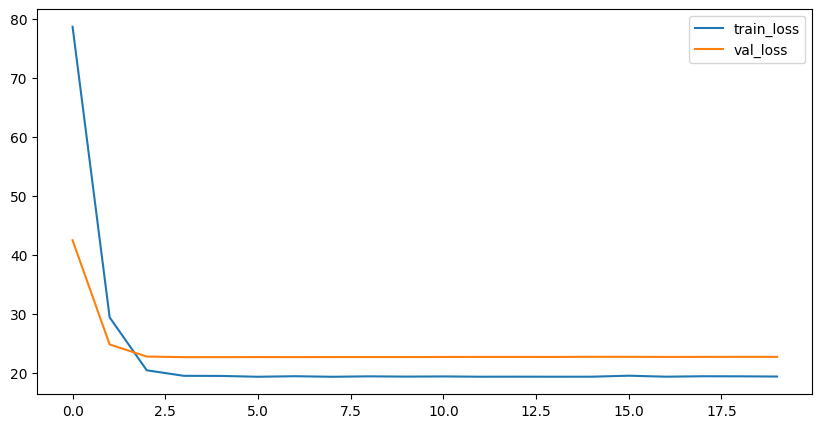

In [ ]:
# 모델 학습 시각화

plt.figure(figsize=(10,5))
plt.plot(h1.history['loss'], label='train_loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 4개의 입력특성을 골라 학습시켜보자!

In [ ]:
X = data[['studytime','freetime','traveltime','health']]
y=data['G3']

In [ ]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=915, test_size=0.2)

In [ ]:
# 데이터 크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((316, 4), (316,), (79, 4), (79,))

In [ ]:
# 1. 신경망 구조 설계
# 뼈대 생성
model2 = Sequential()

# 입력층 input_shape = 나의 특성수
model2.add(InputLayer(input_shape = (4,)))

# 중간층 (은닉층)
model2.add(Dense(units = 10))
model2.add(Activation('sigmoid'))

# 출력층
model2.add(Dense(units = 1))

In [ ]:
# 2. 신경망 학습 및 평가 방법 설정
model2.compile(loss = 'mean_squared_error', # 분류면 crossentrophy
              optimizer = 'SGD', # 경사하강법
              metrics = ['mse'])

In [ ]:
X_train.shape

(316, 4)

In [ ]:
# 3. 모델 학습
h2 = model2.fit(X_train, y_train, validation_split=0.2, epochs = 20)

Epoch 1/20
8/8 [==============================] - 1s 61ms/step - loss: 65.9534 - mse: 65.9534 - val_loss: 33.3558 - val_mse: 33.3558
Epoch 2/20
8/8 [==============================] - 0s 17ms/step - loss: 23.9866 - mse: 23.9866 - val_loss: 24.5803 - val_mse: 24.5803
Epoch 3/20
8/8 [==============================] - 0s 17ms/step - loss: 20.2548 - mse: 20.2548 - val_loss: 23.9685 - val_mse: 23.9685
Epoch 4/20
8/8 [==============================] - 0s 18ms/step - loss: 19.8822 - mse: 19.8822 - val_loss: 23.8810 - val_mse: 23.8810
Epoch 5/20
8/8 [==============================] - 0s 12ms/step - loss: 19.8309 - mse: 19.8309 - val_loss: 23.8382 - val_mse: 23.8382
Epoch 6/20
8/8 [==============================] - 0s 22ms/step - loss: 19.7908 - mse: 19.7908 - val_loss: 23.8027 - val_mse: 23.8027
Epoch 7/20
8/8 [==============================] - 0s 26ms/step - loss: 19.7855 - mse: 19.7855 - val_loss: 23.7863 - val_mse: 23.7863
Epoch 8/20
8/8 [==============================] - 0s 23ms/step - loss

In [ ]:
model2.evaluate(X_test, y_test)

3/3 [==============================] - 1s 6ms/step - loss: 23.7172 - mse: 23.7172


[23.717239379882812, 23.717239379882812]

In [ ]:
h2.history

{'loss': [65.95343017578125,
  23.986631393432617,
  20.25478744506836,
  19.882192611694336,
  19.830942153930664,
  19.790794372558594,
  19.785493850708008,
  19.733327865600586,
  19.71633529663086,
  19.687564849853516,
  19.615758895874023,
  19.650659561157227,
  19.568952560424805,
  19.6837158203125,
  19.587907791137695,
  19.5310001373291,
  19.575424194335938,
  19.583499908447266,
  19.495710372924805,
  19.502979278564453],
 'mse': [65.95343017578125,
  23.986631393432617,
  20.25478744506836,
  19.882192611694336,
  19.830942153930664,
  19.790794372558594,
  19.785493850708008,
  19.733327865600586,
  19.71633529663086,
  19.687564849853516,
  19.615758895874023,
  19.650659561157227,
  19.568952560424805,
  19.6837158203125,
  19.587907791137695,
  19.5310001373291,
  19.575424194335938,
  19.583499908447266,
  19.495710372924805,
  19.502979278564453],
 'val_loss': [33.355804443359375,
  24.580341339111328,
  23.968547821044922,
  23.88102912902832,
  23.8381652832031

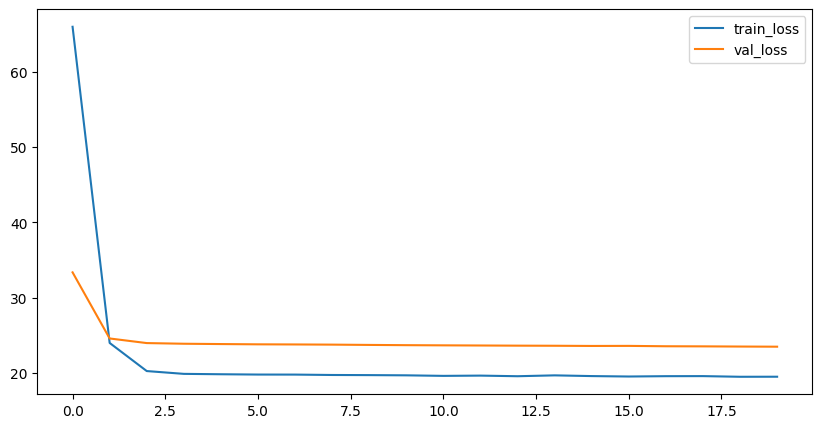

In [ ]:
# 모델 학습 시각화

plt.figure(figsize=(10,5))
plt.plot(h2.history['loss'], label='train_loss')
plt.plot(h2.history['val_loss'], label='val_loss')
plt.legend()
plt.show()